# HOMEWORK 4: GMM
<br>
Full name: Nguyễn Thị Minh Ngọc
<br>
Student ID: 11219280
<br>
Class: DSEB 63

## Libraries

In [1]:
import pandas as pd
import numpy as np

from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt
import seaborn as sns

## Exercise 1

In [2]:
house = pd.read_csv(r"../data/housing.csv")

In [3]:
house

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


1. Calculate Silhouette scores for different number of clusters and choose the most suitable cluster.

In [4]:
def calculate_silhouette_score(X, n_clusters=2):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    sil_score = silhouette_score(X, kmeans.fit_predict(X))
    return sil_score

In [5]:
n_clusters = np.arange(2, 11, 1)
sil_scores = {'number_of_clusters': [],
              'silhouette_score': []}
for n in n_clusters:
    sil_scores['number_of_clusters'].append(n)
    sil_scores['silhouette_score'].append(calculate_silhouette_score(house, n_clusters=n))
sil_scores_df = pd.DataFrame(sil_scores)
sil_scores_df

,number_of_clusters,silhouette_score
0,2,0.705998
1,3,0.606275
2,4,0.560537
3,5,0.560259
4,6,0.538399
5,7,0.526479
6,8,0.524234
7,9,0.523883
8,10,0.518458


In [6]:
print("The most suitable number of clusters:", sil_scores_df[sil_scores_df['silhouette_score']==sil_scores_df['silhouette_score'].max()]['number_of_clusters'].values[0])

The most suitable number of clusters: 2


2. Run the GMM clustering algo. After that you should have cluster for all data samples.

In [7]:
gmm = GaussianMixture(n_components=2, random_state=42)
lables = gmm.fit_predict(house)

3. Use t-SNE to reduce dimension of the original dataset (assigned cluster not included) to 2D.

In [8]:
tsne = TSNE(n_components=2)
house_reduced = tsne.fit_transform(house)

4. Visualize the 2D data with cluster.

In [9]:
house_reduced_df = pd.DataFrame(house_reduced)
house_reduced_df.loc[:, 'labels'] = lables

<Axes: xlabel='0', ylabel='1'>

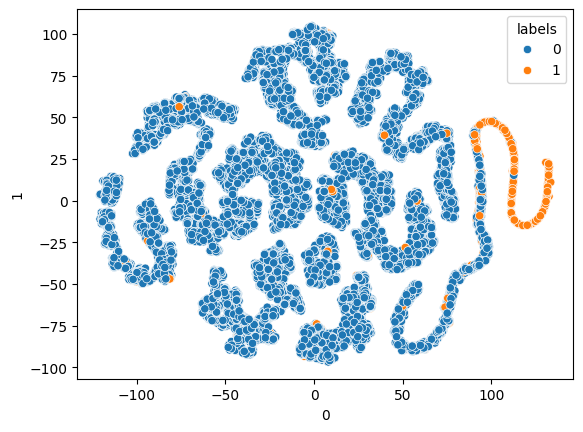

In [10]:
sns.scatterplot(house_reduced_df, x=house_reduced_df.columns[0], y=house_reduced_df.columns[1], hue='labels')

## Exercise 2

Compare k-means and GMM (pros and cons).
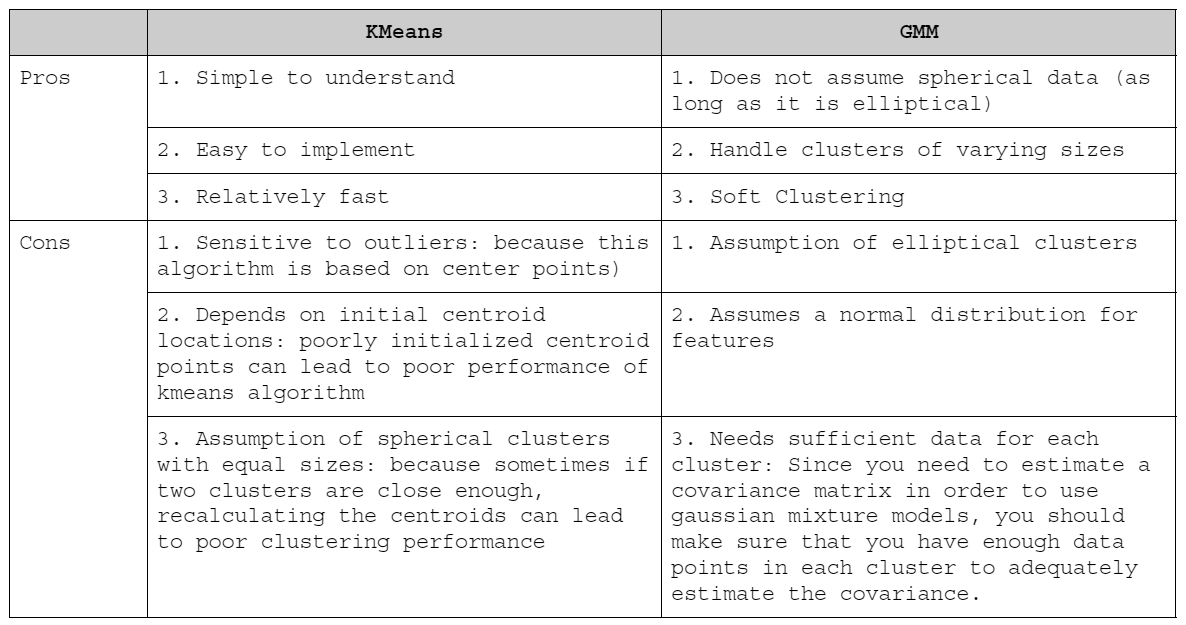

## Exercise 3

Find 3 examples that GMM is better than k-means.
* Clusters are same in variances but varying in sizes
* Clusters of the same sizes but different in variances
* Clusters with ellipticall shapes but not spherical shape

In [11]:
from sklearn.datasets import make_blobs

def ex3_clusters_sample_plot(X1, X2):    
    X1 = pd.DataFrame(X1)
    X1['lables'] = np.zeros(X1.shape[0], dtype=int)
    X2 = pd.DataFrame(X2)
    X2['lables'] = np.ones(X2.shape[0], dtype=int)
    X = pd.concat([X1, X2], axis=0)

    kmeans = KMeans(n_clusters=2)
    gmm = GaussianMixture(n_components=2)

    kmeans_pred = kmeans.fit_predict(X.iloc[:, :2])
    gmm_pred = gmm.fit_predict(X.iloc[:, :2])

    titles = ['No Labels', 'True Labels', 'KMeans', 'GMM']
    colors = [None, X.columns[-1], kmeans_pred, gmm_pred]

    plt.figure(figsize=(20, 5))
    for i in range(1, 5):
        plt.subplot(1, 4, i)
        sns.scatterplot(X, x=X.iloc[:, 0], y=X.iloc[:, 1], hue=colors[i-1])
        plt.title(titles[i-1])
        # plt.xticks(())
        # plt.yticks(())
        plt.xlabel(None)
        plt.ylabel(None)

    plt.show()

1. Clusters are same in variances but varying in sizes

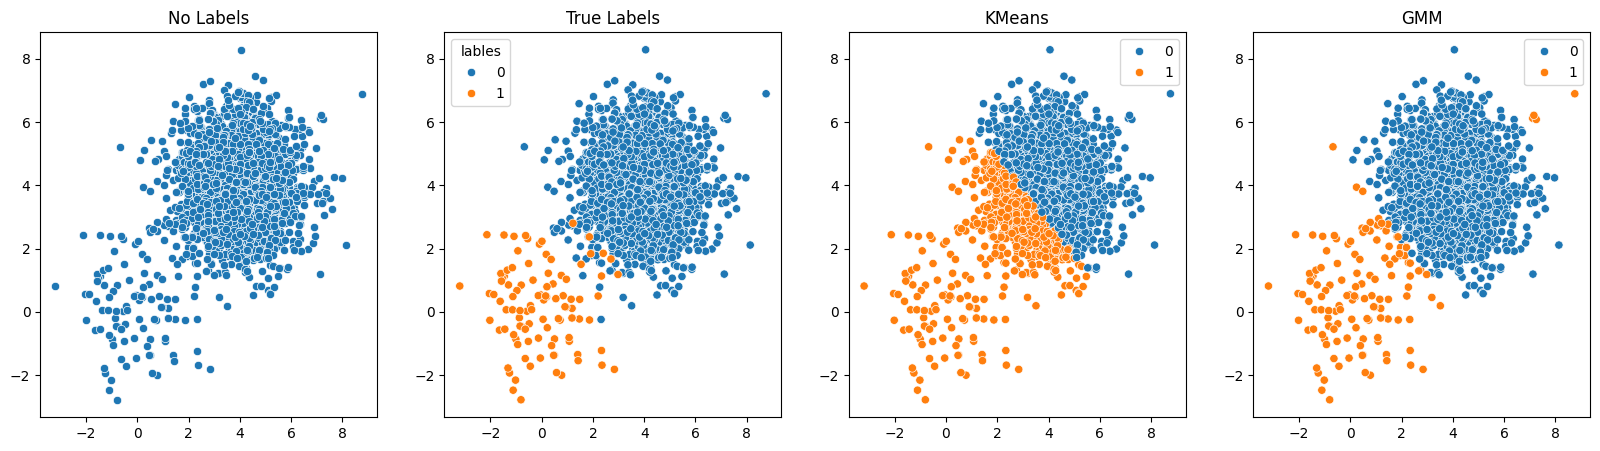

In [12]:
from sklearn.datasets import make_blobs

# generate data (different in sizes, same in variances)
X1, _ = make_blobs(n_samples=2000, cluster_std=1.25, random_state=0, centers=[[4, 4]])
X2, _ = make_blobs(n_samples=100, cluster_std=1.25, random_state=0, centers=[[0, 0]])

ex3_clusters_sample_plot(X1, X2)

2. Clusters of the same sizes but different in variances

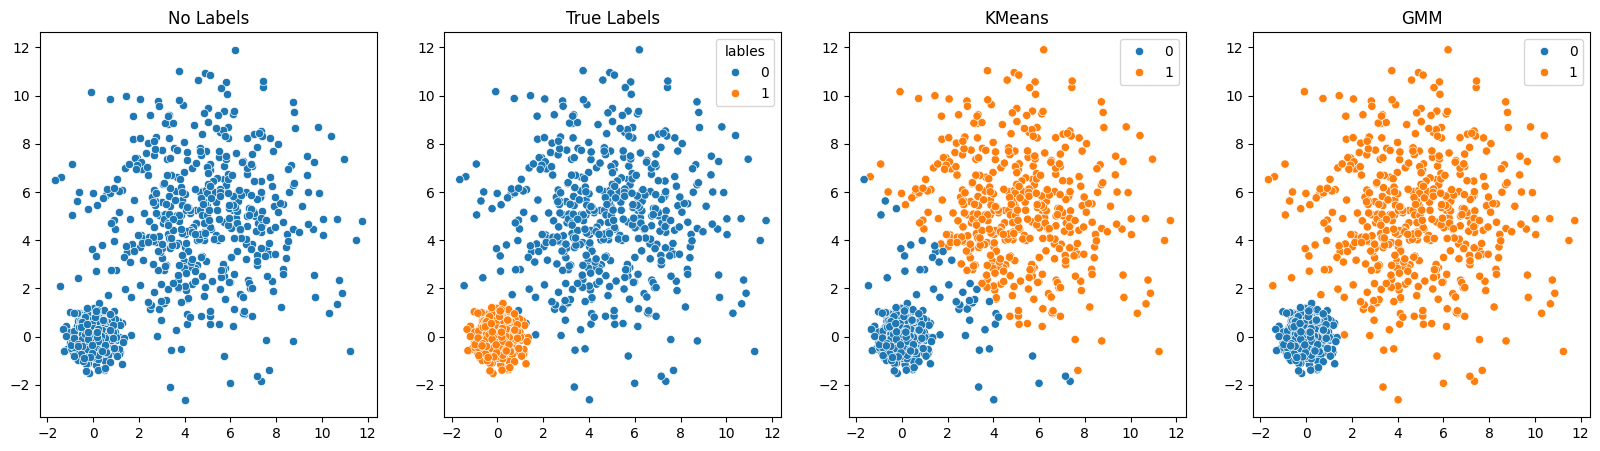

In [13]:
from sklearn.datasets import make_blobs

# generate data (same in sizes, different in variances)
X1, _ = make_blobs(n_samples=500, cluster_std=2.5, random_state=0, centers=[[5, 5]])
X2, _ = make_blobs(n_samples=500, cluster_std=0.5, random_state=0, centers=[[0, 0]])

ex3_clusters_sample_plot(X1, X2)

3. Clusters with ellipticall shapes but not spherical shape

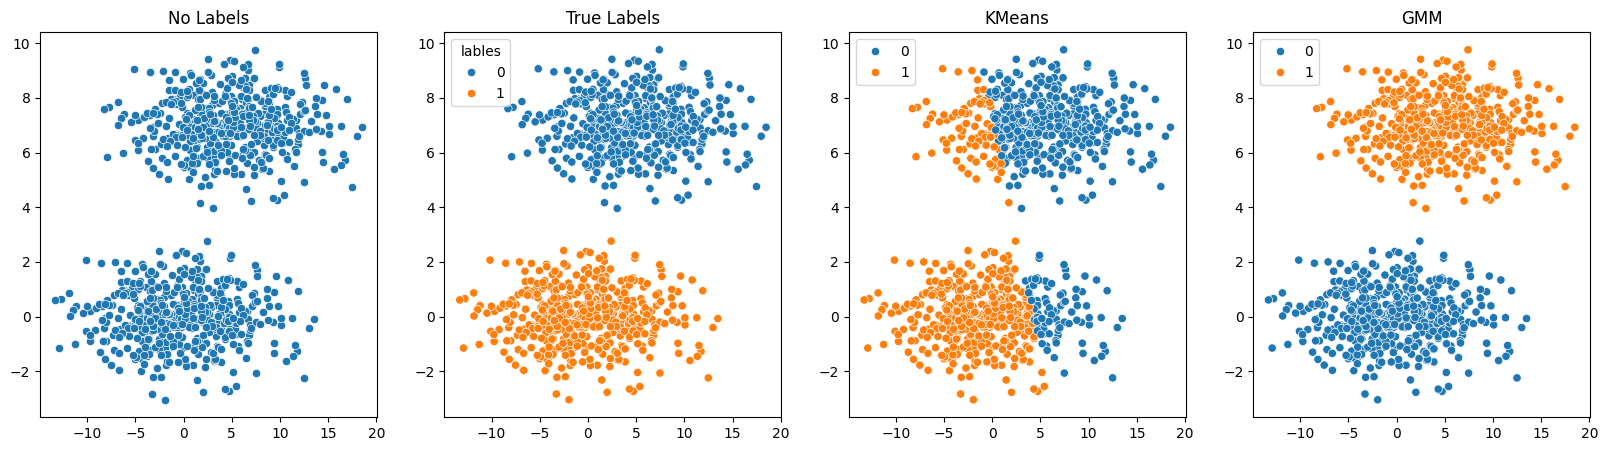

In [14]:
from sklearn.datasets import make_blobs

# generate data (non-spherical but elliptical data)
X1, _ = make_blobs(n_samples=500, cluster_std=[[5, 1]], random_state=0, centers=[[5, 7]])
X2, _ = make_blobs(n_samples=500, cluster_std=[[5, 1]], random_state=0, centers=[[0, 0]])

ex3_clusters_sample_plot(X1, X2)

## Exercise 4

1. Scaling data

In [15]:
minmax = MinMaxScaler(feature_range=(0, 1))
house_scaled = minmax.fit_transform(house)

2. Calculate silhouette scores

In [16]:
n_clusters = np.arange(2, 11, 1)
sil_scores_2 = {'number_of_clusters': [],
              'silhouette_score': []}
for n in n_clusters:
    sil_scores_2['number_of_clusters'].append(n)
    sil_scores_2['silhouette_score'].append(calculate_silhouette_score(house_scaled, n_clusters=n))
sil_scores_df2 = pd.DataFrame(sil_scores_2)
sil_scores_df2

,number_of_clusters,silhouette_score
0,2,0.351901
1,3,0.349504
2,4,0.329491
3,5,0.314413
4,6,0.315165
5,7,0.304914
6,8,0.273997
7,9,0.256731
8,10,0.263409


In [17]:
print("The most suitable number of clusters:", sil_scores_df2[sil_scores_df2['silhouette_score']==sil_scores_df2['silhouette_score'].max()]['number_of_clusters'].values[0])

The most suitable number of clusters: 2


3. Run GMM algorithm

In [18]:
gmm_2 = GaussianMixture(n_components=2, random_state=42)
lables_2 = gmm.fit_predict(house_scaled)

4. Reduce to 2D

In [19]:
tsne_2 = TSNE(n_components=2)
house_reduced_2 = tsne.fit_transform(house_scaled)

5. Visualization

In [20]:
house_reduced_df2 = pd.DataFrame(house_reduced_2)
house_reduced_df2.loc[:, 'labels'] = lables_2

<Axes: xlabel='0', ylabel='1'>

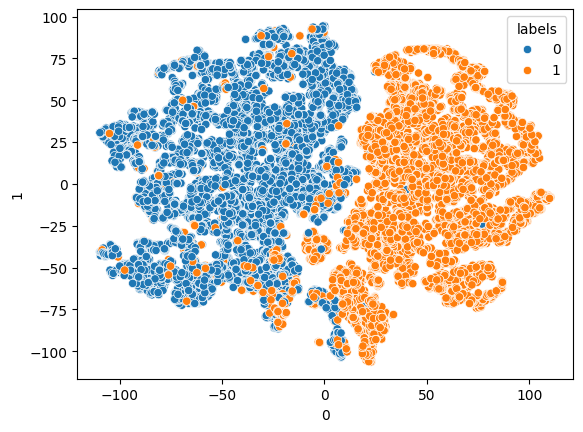

In [21]:
sns.scatterplot(house_reduced_df2, x=house_reduced_df2.columns[0], y=house_reduced_df2.columns[1], hue='labels')

__COMMENTS__
* After scaling, the number of data points in two classes seem to be more balanced but there are also more bad clustering cases (in 2D) &rarr; GMM seems to be sensitive to scaling and it might not work well with non-elliptical data shape.